### Connection to Drive Established

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from pathlib import Path
image_dir = Path("/content/drive/MyDrive/pics")

In [3]:
test_images = []
for ext in ["*.jpg", "*.png", "*.jpeg", "*.JPG", "*.PNG", "*.JPEG"]:
    test_images.extend(image_dir.glob(ext))

test_images

[PosixPath('/content/drive/MyDrive/pics/IMG_5151.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5153.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5154.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5152.PNG')]

#### PHASE 2: EasyOCR

In this phase, EasyOCR was evaluated as a deep learning–based OCR system on the same set of test images used for the PyTesseract baseline. The goal was to analyze its text recognition accuracy, confidence scores, and bounding box localization, particularly for handwritten text.
It uses CNN → feature extraction, LSTM (RNN) → sequence modeling and CTC → decoding

EasyOCR was installed in the Colab environment to perform deep learning–based OCR. Unlike PyTesseract, EasyOCR uses a neural network architecture for text detection and recognition.

In [4]:
!pip install easyocr

import easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 32.1 MB/s eta 0:00:00


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

The EasyOCR reader was initialized using the pre-trained English language model. No custom training or fine-tuning was performed at this stage.

In [5]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

EasyOCR was applied to the test images to extract text and corresponding confidence scores. This allows evaluation of recognition accuracy and model confidence for both printed and handwritten text.

In [6]:
for img_path in test_images:
    results = reader.readtext(str(img_path))

    print("="*50)
    print(img_path.name)
    print("="*50)

    for _, text, conf in results:
        print(f"{text:20s} | Confidence: {conf:.2f}")

IMG_5151.JPG
NO                   | Confidence: 0.90
TO                   | Confidence: 0.72
38PM                 | Confidence: 0.39
PM                   | Confidence: 0.99
SPEED                | Confidence: 1.00
LIMIT                | Confidence: 1.00
25                   | Confidence: 1.00
PARKING              | Confidence: 0.97
FRIDAY               | Confidence: 1.00
1230                 | Confidence: 0.53
Vhunne               | Confidence: 0.14
IMG_5153.JPG
IMG_5154.JPG
57                   | Confidence: 1.00
IMG_5152.PNG
This                 | Confidence: 1.00
is                   | Confidence: 0.80
1                    | Confidence: 0.03
handwr #ten          | Confidence: 0.74
ex                   | Confidence: 1.00
Wrie                 | Confidence: 0.93
Ms                   | Confidence: 0.22
0$                   | Confidence: 0.89
can.                 | Confidence: 0.87
awple                | Confidence: 0.73
Jood                 | Confidence: 0.99
You                  | Confi

***EasyOCR demonstrated strong performance in detecting and localizing printed text, handled handwritten text more effectively, producing more meaningful recognition outputs and confidence scores. But rotated or skewed text was not detected reliably. Additionally, stylized or artistic fonts were not detected by the model.***

Bounding boxes were drawn around detected text regions to analyze EasyOCR’s localization capability. The boxes were visualized on the original images along with recognized text labels.

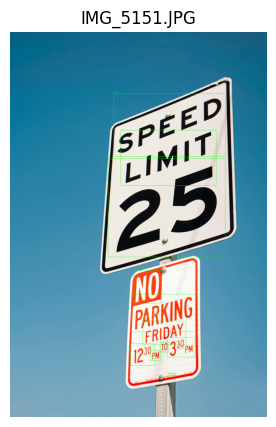

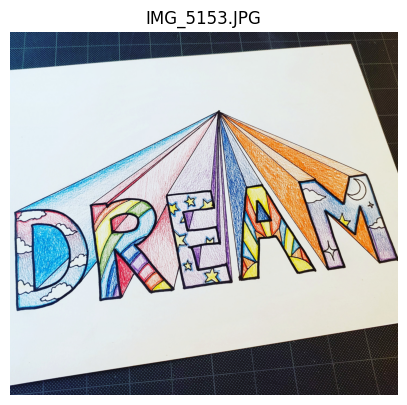

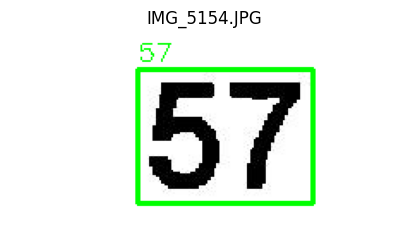

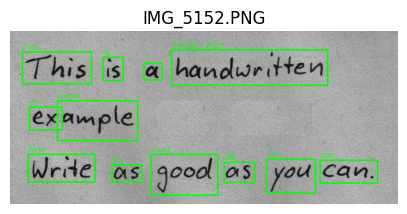

In [10]:
for img_path in test_images:
    img = cv2.imread(str(img_path))
    img_box = img.copy()

    results = reader.readtext(str(img_path))
    for box, text, conf in results:
        x = [int(p[0]) for p in box]
        y = [int(p[1]) for p in box]
        cv2.rectangle(img_box, (min(x),min(y)), (max(x),max(y)), (0,255,0), 2)
        cv2.putText(img_box, text, (min(x),min(y)-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
    plt.title(img_path.name)
    plt.axis("off")

***Bounding box formation was accurate and well-aligned for standard printed and handwritten text. Exceptions were primarily observed in cases involving rotated, skewed, or artistic text styles, where bounding boxes were either missing or incorrectly positioned.***